In [4]:
#Problem 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#1st col is userid, 2nd col is movieid, 3rd col is rating, 4th col is timestamp
dataset = pd.read_csv('ratings.csv')

X = dataset.iloc[:,:].values

total_user = len(np.unique(X[:,0]))

total_movie = len(np.unique(X[:,1]))

available_ratings = len((X[:,1]))

possible_ratings = total_user*total_movie

print(available_ratings)
print(possible_ratings)

sparsity = (available_ratings+0.0)/ possible_ratings

print("Sparsity is:%f" %sparsity)

100004
6083286
Sparsity is:0.016439


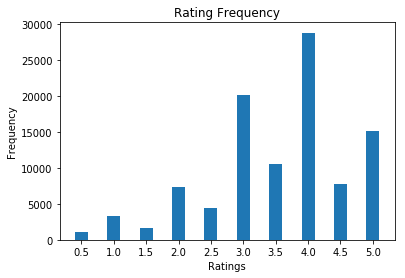

It can be concluded that most of ratings are in interval 3.0 - 5.0.
The rating with score 4 appears most frequent.
The rating with score 0.5 appears least frequent.


In [5]:
#Problem 2

ratings, counts = np.unique(X[:,2], return_counts=True)

x_values = ratings

y_values = counts

plt.bar(x_values,y_values,width = 0.2, tick_label=ratings)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Rating Frequency")
plt.show()
print("It can be concluded that most of ratings are in interval 3.0 - 5.0.")
print("The rating with score 4 appears most frequent.")
print("The rating with score 0.5 appears least frequent.")

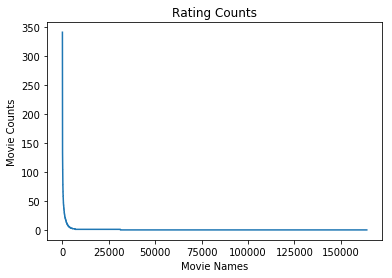

In [6]:

#Problem 3

movie_names,movie_counts = np.unique(X[:,1], return_counts=True)

movie_tuples = []
for i in range(0,len(movie_names)):
    movie_tuple = movie_names[i],movie_counts[i]
    movie_tuples.append(movie_tuple)
    

movie_tuples_sorted = sorted(movie_tuples,key = lambda movie_tuple: movie_tuple[1], reverse=True)

moive_names, movie_counts = zip(*movie_tuples_sorted)

plt.plot(movie_names,movie_counts)
plt.xlabel("Movie Names")
plt.ylabel("Movie Counts")
plt.title("Rating Counts")
plt.show()

In [7]:
#Problem 30
from surprise.prediction_algorithms.baseline_only import BaselineOnly
#from surprise.prediction_algorithms.baseline_only.BaselineOnly
from surprise.model_selection.validation import cross_validate
from surprise import Dataset
from surprise import Reader
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader()

data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)

In [8]:
dataset = pd.read_csv('ratings.csv')
X = dataset.iloc[:,:].values
user_names_total = X[:,0]
movie_ratings_total = X[:,2]
user_names = np.unique(X[:,0])

#Build a dictionary, use movie name as key and movie rating as value
movie_ratings_dict = dict()
for i in range(0,len(movie_ratings_total)):
    key = X[i, 0]
    value = X[i, 2]
    if (key in movie_ratings_dict):
        movie_ratings_dict[key].append(value)
    else:
        movie_ratings_dict[key] = [value]
#print movie_ratings_dict
mean_ratings_dict = dict()
for i in range(0, len(user_names)):
    mean_user = np.mean(movie_ratings_dict.values()[i])
    mean_ratings_dict[user_names[i]]= [mean_user]
    for j in range(1, len(movie_ratings_dict.values()[i])):
        mean_ratings_dict[user_names[i]].append(mean_user)
rmse_dict = dict()
mae_dict = dict()
for i in range(0, len(user_names)):
    rmse = mean_squared_error(movie_ratings_dict.values()[i], mean_ratings_dict.values()[i])
    mae  = mean_absolute_error(movie_ratings_dict.values()[i], mean_ratings_dict.values()[i])
    rmse_dict[user_names[i]] = [rmse]
    mae_dict[user_names[i]] = [mae]
average_rmse = np.mean(rmse_dict.values())
print average_rmse

0.922334727606


In [15]:
#Problem 31

def popular_movie_trimming(testset):
    movieId_count = {}
    for record in testset:
        if record[1] not in movieId_count.keys():
            movieId_count[record[1]] = 1
        else:
            movieId_count[record[1]] = movieId_count[record[1]] + 1
    testset[:] = [record for record in testset if movieId_count[record[1]] > 2]

#Define a popular trimming function 

def pop_trim(data):
    #Set the trimming condition
    trim_condition = lambda x : x <= 2
    #Build a dictionary which contains key = movie id and value = number of ratings
    movie_ratings_dict = dict()
    for info in data:
        #Data is a list of tuples (user_id,movie_id,ratings)
        movie_id = info[1]
        if (movie_id not in movie_ratings_dict):
            movie_ratings_dict[movie_id] = 1
        else:
            movie_ratings_dict[movie_id] += 1
            
    for movie_id in movie_ratings_dict:
        if trim_condition (movie_ratings_dict[movie_id]):
            data = filter(lambda x:x[1]!=movie_id,data)
            
        return data
    
data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)
dataset = pd.read_csv('ratings.csv')
X = dataset.iloc[:,:].values



TypeError: iteration over non-sequence

In [245]:
userId = []
movieId = []
rating = []
for i in range(0, len(X[:,1])):
    if movieId_count.values()[i] > 2:
        user = 

247
107
59
13
56
104
53
5
20
122
82
18
8
31
11
88
86
26
92
13
95
38
22
34
101
5
7
18
40
10
42
196
148
11
104
120
6
23
9
12
38
43
12
201
61
5
201
51
3
6
14
45
32
7
87
6
10
20
5
8
22
48
7
6
13
19
15
10
26
4
18
10
3
16
17
3
23
17
12
11
22
93
8
4
21
17
11
4
94
48
4
27
228
118
49
5
6
6
5
5
19
7
21
10
8
27
23
93
26
43
7
21
6
200
48
3
129
16
9
11
8
58
8
63
80
33
63
26
142
4
43
8
26
6
48
70
4
23
18
13
5
6
44
15
102
48
16
6
5
35
24
14
55
43
3
4
23
31
4
10
28
113
5
3
9
18
42
7
15
4
22
109
35
52
16
12
25
158
24
13
12
78
34
34
5
15
5
4
4
61
43
13
20
4
41
125
4
5
42
13
11
5
291
51
20
62
73
13
4
3
9
4
39
27
3
5
22
35
5
4
22
18
44
5
107
14
16
6
110
132
3
4
324
16
90
7
24
3
12
32
31
22
3
5
7
17
44
145
70
311
38
4
7
14
3
7
26
8
114
10
6
10
50
14
3
88
15
101
8
56
175
48
6
7
40
115
70
13
7
67
39
341
122
7
12
25
30
5
200
10
11
157
71
9
67
20
34
18
20
47
180
12
21
198
29
19
13
4
7
3
6
5
3
3
5
10
3
48
7
16
10
73
25
26
7
12
6
13
15
57
11
9
14
3
4
12
14
23
9
32
63
106
55
5
4
90
37
95
6
7
9
9
11
16
7
8
5
110
3

55
12
5
4
176
8
4
15
10
7
16
10
6
3
13
3
4
10
5
3
3
4
6
3
3
5
7
5
48
7
10
11
9
4
8
29
3
3
5
3
16
12
4
21
7
17
9
3
13
6
7
25
106
4
6
7
8
28
3
3
6
3
3
13
10
5
8
103
7
17
23
28
16
32
7
67
3
4
4
9
3
7
5
22
3
13
12
4
4
11
5
6
3
3
4
6
4
6
3
3
7
6
40
11
3
6
3
4
5
9
5
4
7
4
11
4
17
3
3
21
5
6
3
16
9
3
3
3
3
6
3
5
4
20
3
6
6
4
4
3
7
3
5
7
3
3
4
3
3
5
4
6
3
7
59
5
4
4
3
4
3
11
6
8
8
3
7
26
22
3
3
3
3
5
4
15
5
4
54
3
3
18
12
9
3
3
3
4
81
25
4
42
15
84
5
7
20
4
10
11
45
6
4
12
4
3
43
3
8
45
4
29
3
3
14
4
3
9
16
3
37
37
4
5
33
3
7
7
3
5
5
7
3
4
3
6
16
7
25
3
4
46
13
8
84
17
8
34
4
57
17
3
4
74
7
5
5
4
4
3
6
4
13
58
3
4
49
23
11
22
8
18
7
4
3
8
5
11
14
11
4
5
26
70
5
4
11
4
18
12
34
3
20
51
4
3
4
3
13
4
45
3
33
21
126
7
14
3
8
37
8
19
17
34
12
3
6
4
8
3
4
7
3
3
24
5
3
5
3
12
3
20
7
22
4
4
32
4
3
6
3
3
3
3
3
4
5
3
3
3
11
4
8
3
3
4
15
3
4
5
16
9
4
3
3
14
5
3
4
3
10
33
3
3
3
8
3
6
4
30
6
4
4
3
5
7
9
43
6
8
20
6
5
9
73
3
40
28
5
6
3
5
3
37
17
6
4
4
25
12
10
3
3
14
5
29
40
6
3
3
4
6
6
4
5
3
4
4
4
4
21
9


IndexError: list index out of range